![title](upskill_logo.png)

# <center>Previsão de Evolução do COVID19 em Portugal (Linear Regression)</center>
<center>Trabalho desenvolvido por: <i>Sérgio F. Paulos</i>, formando do Programa UPSkills, módulo de Machine Learning (2020/2021)</center>
<br>
Neste Notebook irei importar dados acerca da pandemia do COVID e responder a uma questão muito simples: será que o número de novos casos diários tem uma correlação directa com o número de novos óbitos ? Irei analisar a fundo estes e outros dados e depois criar um modelo de Regressão Linear para fazer a previsão de novos óbitos. Esse modelo será testado, afinado e depois mostrado de uma forma gráfica para que possamos visualizar de que forma funciona. Para realizar este Notebook baseei-me tanto nas aulas leccionadas como em inúmeros sites de tutoriais de Python e de Jupyter Notebook, bem como de programação em geral.
<br>
<br>
Neste notebook irei seguir os procedimentos abaixo descritos, para chegar ao meu objectivo final:
<ul>
    <li><b>1 - Importação das Bibliotecas e Recursos necessários</b></li>
    <li><b>2 - Criação do Dataset</b></li>
    <li>&nbsp;&nbsp;&nbsp;2.1 - Visualização de Estatísticas do Dataset</li>
    <li><b>3 - Correlação entre Features e definição daquelas a estudar</b></li>
    <li><b>4 - Treino e Teste do nosso modelo</b></li>
    <li>&nbsp;&nbsp;&nbsp;4.1 - Scaling</li>
    <li>&nbsp;&nbsp;&nbsp;4.2 - Visualização dos Training e Testing sets</li>
    <li><b>5 - Criação do Modelo</b></li>
    <li>&nbsp;&nbsp;&nbsp;5.1 - Model Testing
    <li><b>6 - Previsões do modelo de Regressão Linear</b></li>
    <li><b>7 - Exploração de modelo alternativo: Random Forests</b></li>
    <li>&nbsp;&nbsp;&nbsp;7.1 - Criação do Dataset: DataWrangling</li>
    <li><b>8 - Test, Train, Split</b></li>
    <li><b>9 - Score do modelo</b></li>
    <li><b>10 - Conclusões</b></li>
</ul>
<br>
Os dados do Dataset utilizado foram reunidos a partir das seguintes fontes:
<br>
<a href="https://github.com/dssg-pt/covid19pt-data/blob/master/data.csv">Git Hub</a> | <a href="https://covid19.min-saude.pt/ponto-de-situacao-atual-em-portugal/">Direcção Geral de Saúde</a> | <a href="https://www.ecdc.europa.eu/en/covid-19/data">European Center for Disease Control</a>



## 1) Importação das Bibliotecas e Recursos necessários
<br>
Para começar importamos todas as Bibliotecas e Recursos que são necessários para corrermos convenientemente o nosso projecto, nomeadamente o Pandas, o MatplotLib, o SKLearn, o Numpy e ainda algum código que nos permite que os plots apareçam directamente no nosso Notebook.

In [1]:
#Importamos bibliotecas e recursos

import pandas as pd #importamos a biblioteca Pandas e damos-lhe o alias "pd"
import matplotlib.pyplot as plt #importamos o motor matplotlib.pyplot para gráficos e damos-lhe o alias "plt"
from sklearn.linear_model import LinearRegression #importamos o sklearn para fazermos o nosso modelo e verificarmos alguns dados
from sklearn import metrics
from sklearn.model_selection import train_test_split #aqui importamos a parte do sklearn que nos permite treinar e testar o nosso modelo
import numpy as np #importamos o sempre importante numpy
import seaborn as sns # importamos o SNS para alguns gráficos
#este código permite que as plots apareçam directamente no notebook por uma questão de visualização
from sklearn.preprocessing import MaxAbsScaler #para fazer o Stratify
%matplotlib inline 
from matplotlib.pyplot import figure

## 2) Criação do Dataset - Data Wrangling
<br>
Nesta altura do projecto acho premente fazer algumas notas acerca da criação deste Dataset. Visto que o mesmo não existia como desejava em nenhum lado, procedi com a prossecução de um que iria ter variáveis bastante correlacionáveis umas com as outras para podermos maximizar os efeitos do nosso modelo. <br> Desde o módulo anterior de "Data Science" e mesmo neste de "Machine Learning", cada vez mais fiquei com a notória impressão de que tudo o que fazemos depende intrinsecamente da qualidade dos dados dos quais partimos. Se temos dados que até podem ser bons, mas não temos uma comparação que faça sentido, todo o esforço que poderemos ter na criação de um modelo é um pouco em vão, visto que estará condenado à partida. Dediquei portanto algum tempo a criar um dataset de um tema actual como é o COVID, coloquei as features que me pareciam que faziam mais sentido (por exº criar features de "novos_obitos" em vez apenas do valor cumulativo) e que num modelo maximizassem as hipóteses deste correr bem.
<br>
<br>
Quando fiquei satisfeito com os dados de que partia, procedi à importação dos mesmos. Visto que o Jupyter parece-me estar pré-definido para separadores ",", tive de especificar que queria a minha importação com separadores ";" para os dados fazerem sentido. Neste caso não foi preciso especificar o tipo de codificação para "latin" como por vezes é necessário.
<br>
<br>
Começamos o nosso Data Wrangling a importar o nosso ficheiro RAW e a colocá-lo logo num DataFrame:

In [2]:
#Importamos o ficheiro raw em CSV
df1 = pd.read_csv('data_covid_raw.csv' , sep = ";") #importamos a data para o notebook e simultaneamente criamos o nosso DataFrame com ela
df1.head(10)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos
0,26/02/2020,26/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,27/02/2020,27/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,28/02/2020,28/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,29/02/2020,29/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,01/03/2020,01/03/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,02/03/2020,02/03/2020,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN
6,03/03/2020,03/03/2020,4,2,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0,NaN
7,04/03/2020,04/03/2020,6,3,1,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0,NaN
8,05/03/2020,05/03/2020,9,5,1,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0,NaN
9,06/03/2020,06/03/2020,13,8,1,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0,NaN


Como existem muitas colunas que para este meu Notebook não fazem muito sentido, o passo seguinte foi apagá-las e criar um outro Dataframe:

In [3]:
#Vamos apagar colunas:

df = df1.drop(['data_dados', 'confirmados_arsnorte', 'data_dados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
       'sintomas_cefaleia', 'sintomas_dores_musculares',
       'sintomas_fraqueza_generalizada', 'confirmados_f', 'confirmados_m',
       'obitos_arsnorte', 'obitos_arscentro', 'obitos_arslvt',
       'obitos_arsalentejo', 'obitos_arsalgarve', 'obitos_acores',
       'obitos_madeira', 'obitos_estrangeiro', 'recuperados_arsnorte',
       'recuperados_arscentro', 'recuperados_arslvt',
       'recuperados_arsalentejo', 'recuperados_arsalgarve',
       'recuperados_acores', 'recuperados_madeira', 'recuperados_estrangeiro',
       'obitos_0_9_f', 'obitos_0_9_m', 'obitos_10_19_f', 'obitos_10_19_m',
       'obitos_20_29_f', 'obitos_20_29_m', 'obitos_30_39_f', 'obitos_30_39_m',
       'obitos_40_49_f', 'obitos_40_49_m', 'obitos_50_59_f', 'obitos_50_59_m',
       'obitos_60_69_f', 'obitos_60_69_m', 'obitos_70_79_f', 'obitos_70_79_m',
       'obitos_80_plus_f', 'obitos_80_plus_m', 'obitos_f', 'obitos_m',
       'confirmados_desconhecidos_m', 'confirmados_desconhecidos_f', 'ativos',
       'internados_enfermaria', 'confirmados_desconhecidos'], axis=1)

Como temos as primeiras colunas que têm valores de zero e irão afectar negativamente as nossas médias do modelo, apagamos as primeiras linhas que não têm interesse relevante para a análise do nosso problema (verifiquei que a diferença entre ter estas linhas era a difª entre ter um MAE de mais de 400 ou um por volta de 12):

In [4]:
#Apagamos as linhas que tinham todos os valores a zero
df.drop(df.index[:5], inplace = True)
df

,data,confirmados,obitos,internados,internados_uci
5,02/03/2020,2,0,0,0
6,03/03/2020,4,0,0,0
7,04/03/2020,6,0,0,0
8,05/03/2020,9,0,9,0
9,06/03/2020,13,0,13,0
...,...,...,...,...,...
331,22/01/2021,609136,9920,5779,715
332,23/01/2021,624469,10194,5922,720
333,24/01/2021,636190,10469,6117,742
334,25/01/2021,643113,10721,6420,767


Como queremos analisar campos que não existem, vamos agora criar duas novas colunas: a dos <b>"Novos Casos"</b> (difª entre dias dos "Confirmados") e dos <b>Novos Óbitos</b> (difª entre dias dos "Óbitos"). Este passo foi criado em grande parte com a função "shift" que nos permite saltar uma ou mais linhas.

In [5]:
# aqui criamos as novas colunas com os calculos dos novos casos e novos obitos

df.insert(loc=2, column='novos_casos', value = (df['confirmados'] - df['confirmados'].shift(+1)))
df.insert(loc=4, column='novos_obitos', value = (df['obitos'] - df['obitos'].shift(+1)))

df

,data,confirmados,novos_casos,obitos,novos_obitos,internados,internados_uci
5,02/03/2020,2,NaN,0,NaN,0,0
6,03/03/2020,4,2.0,0,0.0,0,0
7,04/03/2020,6,2.0,0,0.0,0,0
8,05/03/2020,9,3.0,0,0.0,9,0
9,06/03/2020,13,4.0,0,0.0,13,0
...,...,...,...,...,...,...,...
331,22/01/2021,609136,13987.0,9920,234.0,5779,715
332,23/01/2021,624469,15333.0,10194,274.0,5922,720
333,24/01/2021,636190,11721.0,10469,275.0,6117,742
334,25/01/2021,643113,6923.0,10721,252.0,6420,767


O problema desta função é que nos deixou alguns valores como NaN. Visto que estes valores são zero, podemos fazer a substituição no passo seguinte com a função .fillna(0).

In [6]:
#replace NaN by zero
df['novos_casos'] = df['novos_casos'].fillna(0)
df['novos_obitos'] = df['novos_obitos'].fillna(0)
df

,data,confirmados,novos_casos,obitos,novos_obitos,internados,internados_uci
5,02/03/2020,2,0.0,0,0.0,0,0
6,03/03/2020,4,2.0,0,0.0,0,0
7,04/03/2020,6,2.0,0,0.0,0,0
8,05/03/2020,9,3.0,0,0.0,9,0
9,06/03/2020,13,4.0,0,0.0,13,0
...,...,...,...,...,...,...,...
331,22/01/2021,609136,13987.0,9920,234.0,5779,715
332,23/01/2021,624469,15333.0,10194,274.0,5922,720
333,24/01/2021,636190,11721.0,10469,275.0,6117,742
334,25/01/2021,643113,6923.0,10721,252.0,6420,767


Para completar o Data Wrangling, podemos também retirar as casas decimais, visto que para o caso em estudo não iremos precisar de décimas. Isto é definido alterando as definições do próprio Dataset, no campo "precision".

In [7]:
#tiramos as casas decimais

pd.set_option('precision', 0)
df.tail(10)

,data,confirmados,novos_casos,obitos,novos_obitos,internados,internados_uci
326,17/01/2021,549801,10385,8861,152,4889,647
327,18/01/2021,556503,6702,9028,167,5165,664
328,19/01/2021,566958,10455,9246,218,5291,670
329,20/01/2021,581605,14647,9465,219,5493,681
330,21/01/2021,595149,13544,9686,221,5630,702
331,22/01/2021,609136,13987,9920,234,5779,715
332,23/01/2021,624469,15333,10194,274,5922,720
333,24/01/2021,636190,11721,10469,275,6117,742
334,25/01/2021,643113,6923,10721,252,6420,767
335,26/01/2021,653878,10765,11012,291,6472,765


O nosso Dataset está assim completo, e pronto para várias análises.

## 2.1) Visualização de estatísticas do dataset
<br>
Abaixo podemos ver algumas medidas mais importantes presentes no dataset a partir do qual iremos fazer as nossas previsões:

In [8]:
#Dados do nosso Dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
confirmados,331,127175,156514,2,30547,53783,159145,653878
novos_casos,331,1975,2911,0,258,474,2902,15333
obitos,331,2530,2335,0,1309,1772,2717,11012
novos_obitos,331,33,49,0,4,13,47,291
internados,331,1344,1374,0,418,659,2356,6472
internados_uci,331,203,199,0,59,105,322,767


## 3) Correlação entre features e definição daquelas a estudar
<br>
Neste ponto utilizei o pairplot e o heatmap do SNS  para verificar algumas das correlações entre as variáveis que tinha disponíveis. Como podemos ver existem algumas correlações bastante fortes. A correlação que me fez mais sentido analisar no âmbito deste projecto foi a que existe entre o aparecimentos de novos_casos e novos_obitos que sucedem. Como podemos verificar no heatmap têm uma correlação de 0.92. Pelo gráfico podemos ver que não existe o "Overfitting" como sucede por exemplo noutras relações, o que iria definitivamente prejudicar o nosso modelo.
<br>
<br>

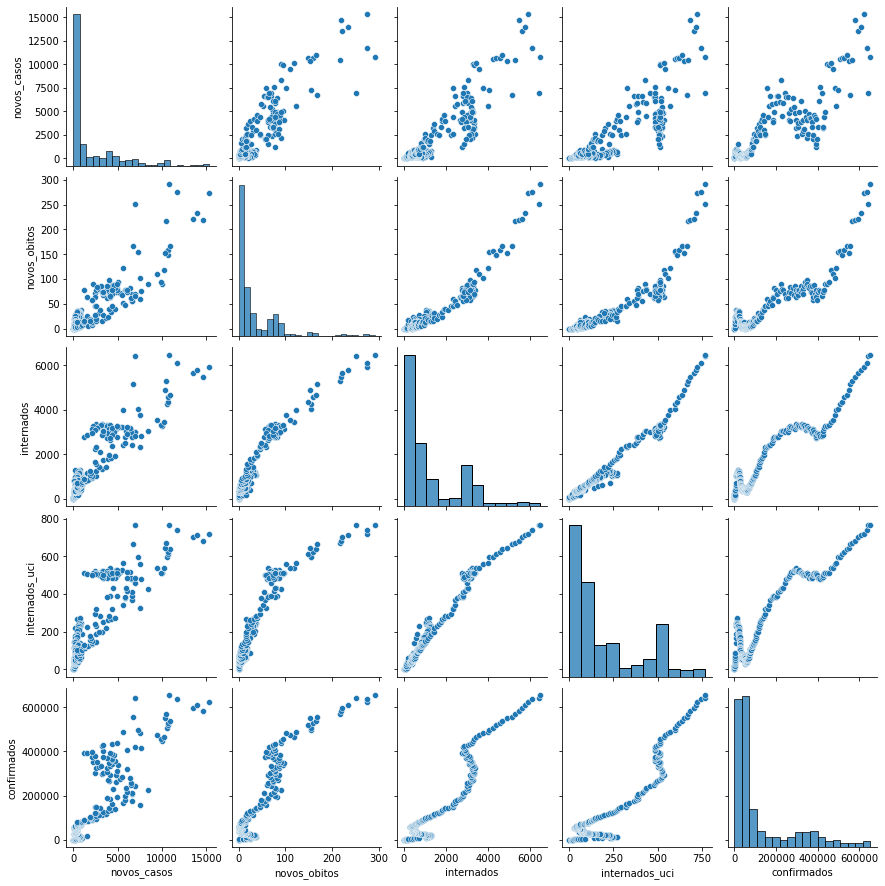

In [99]:
#Aqui utilizamos a função Pairplot do SNS para analisar a correlação entre features disponíveis.
sns.pairplot(df, vars = ['novos_casos', 'novos_obitos', 'internados', 'internados_uci','confirmados'] )

<AxesSubplot:>

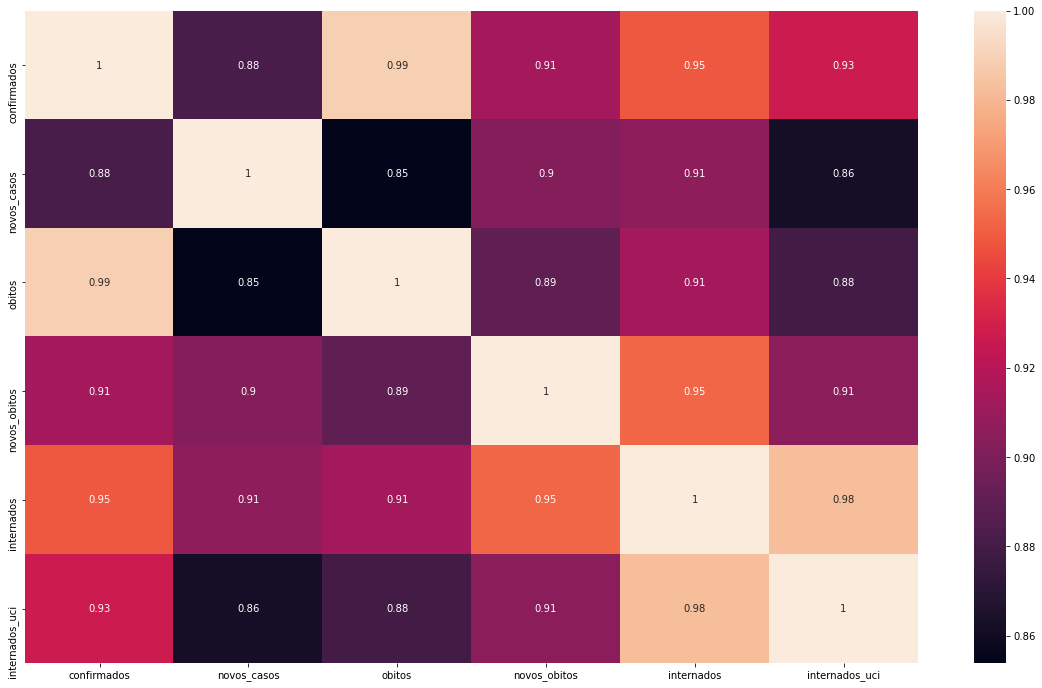

In [9]:
#Abaixo vemos num heatmap do SNS as correlações mais bem definidas em termos numéricos.
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True) 

Em baixo fiz um novo gráfico de "Scatter" escolhendo os eixos x e y do nosso DataFrame disponível e formatei-o de modo a mostrar em mais detalhe a correlação a analisar:

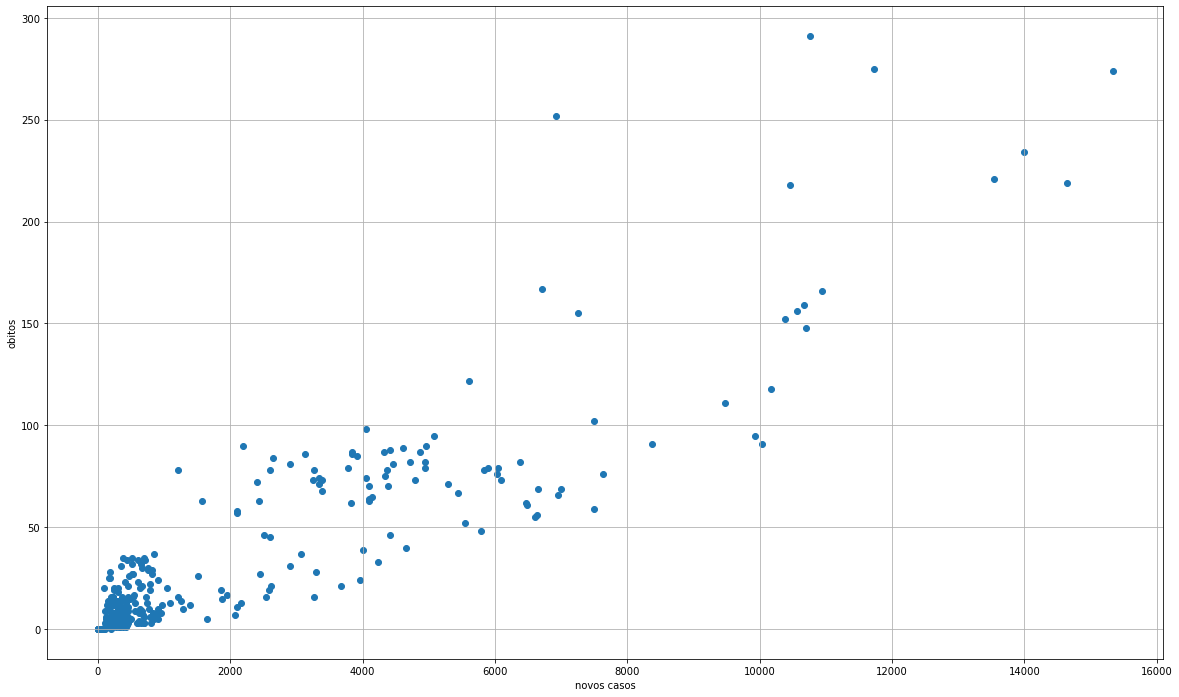

In [12]:
#Construção do gráfico Scatter com as Features escolhidas

X = df["novos_casos"] #definição do eixo X
y = df["novos_obitos"] # definição do eixo Y

plt.figure(figsize=(20,12)) #definimos o tamanho do gráfico
plt.scatter(X, y) #definimos o tipo de gráfico
plt.xlabel("novos casos") # mete o nome do eixo X
plt.ylabel("obitos") #mete o nome do eixo Y
plt.grid() #coloca a grelha

## 4) Treino e Teste do nosso modelo
<br>
De seguida foi utilizado o método de Test, Train, Split para treinar e testar o nosso modelo de Regressão Linear. Após várias experiências com o "test_size" e o "random_state", os melhores valores a que cheguei foram 0.3 e 20. 

In [13]:
#faz o test train split

X_train, X_test, y_train, y_test = train_test_split(df.novos_casos, df.novos_obitos, test_size = 0.3, random_state = 20)


## 4.1) Scaling
<br>
No passo seguinte realizei apenas o <b>Scaling</b> para verificar noutro Notebook separado se os resultados do modelo seriam de alguma forma alterados, mas cheguei à conclusão que são muito semelhantes, daí os passos subsequentes a este serem sempre realizados com o DataFrame original.

In [14]:
#Processo de Stratify no nosso DataFrame "df" original:

df1 = df.drop(['data', 'confirmados','obitos','internados_uci', 'internados'], axis=1) #cria novo dataframe apenas com as duas colunas que pretendo

#cria uma variável abs_scaler com o meétodo MaxAbsScaler()
abs_scaler = MaxAbsScaler()

#calcula o valor máximo absoluto para escalar a data utilizando o método fit
abs_scaler.fit(df1)

#calcula os valores máximos absolutos efectuados pelo método fit
abs_scaler.max_abs_

#transforma os dados utilizandos os parâmetros calculados pelo método fit
scaled_data = abs_scaler.transform(df1)

#guarda os resultados num novo dataframe
df_escalado = pd.DataFrame(scaled_data, columns=df1.columns)

# visualize the data frame
df_escalado

,novos_casos,novos_obitos
0,0e+00,0e+00
1,1e-04,0e+00
2,1e-04,0e+00
3,2e-04,0e+00
4,3e-04,0e+00
...,...,...
326,9e-01,8e-01
327,1e+00,9e-01
328,8e-01,9e-01
329,5e-01,9e-01


## 4.2) Visualização dos Training e Testing sets
<br>
Aqui podemos ver os tamanhos dos sets criados nos passos anteriores para treinar e depois testarmos o nosso modelo. Como já foi referido anteriormente, foi com uma proporção de 70/30 que chegámos aos melhores resultados.

In [15]:
print ('The size of our training "X" (input features - X_train) is', X_train.shape)
print ('The size of our testing "X" (input features - X_test) is', X_test.shape)
print ('The size of our training "y" (output feature - y_train) is', y_train.shape)
print ('The size of our testing "y" (output features - y_test) is', y_test.shape)

The size of our training "X" (input features - X_train) is (231,)
The size of our testing "X" (input features - X_test) is (100,)
The size of our training "y" (output feature - y_train) is (231,)
The size of our testing "y" (output features - y_test) is (100,)


De seguida podemos visualizar graficamente o que foi feito nos passos anteriores, é visível que é possível traçar uma linha bastante direita entre quase todos os pontos, o que é indicativo que os dados estão bons para o nosso modelo.

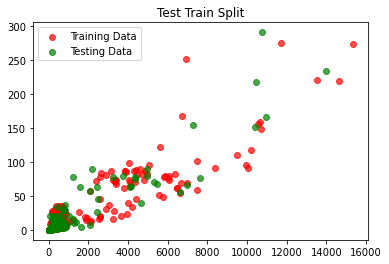

In [16]:
#visualiza o passo anterior

plt.scatter(X_train, y_train, label = "Training Data", color = "r", alpha = .7)
plt.scatter(X_test, y_test, label = "Testing Data", color ="g", alpha = .7)
plt.legend()
plt.title("Test Train Split")
plt.show()

## 5) Criação do modelo
<br>
Agora vamos criar uma variável "LR" que contenha o nosso modelo de Regressão Linear e depois fazer o reshape dos nossos dados de treino para fazer o fit nesse mesmo modelo:

In [17]:
#Cria o modelo

LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

## 5.1) Model Testing
<br>
Com o modelo já criado, é possível criarmos a nossa linha da Regressão Linear e comparar como ela se comporta em relação aos dados de teste. Neste caso como podemos ver, a linha está bastante aproximada de todos os pontos.

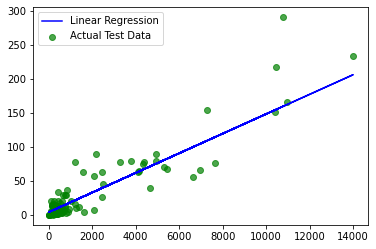

In [18]:
#Criação da variável Prediction que nos dará o resultado da previsão
prediction = LR.predict(X_test.values.reshape(-1,1))

#Plot prediction line / Test Data
plt.plot(X_test, prediction, label="Linear Regression", color="b")
plt.scatter(X_test, y_test, label="Actual Test Data", color ="g", alpha=.7)
plt.legend()
plt.show()

Podemos ainda ver outras medidas que servem para aferir da qualidade do nosso modelo, tais como: 
<br>
<ul>
    <li><b>M.A.E. - Mean Absolute Error</b></li>
    <li><b>M.S.E. - Mean Squared Error</b></li>
    <li><b>R.M.S.E. - Root Mean Squared Error</b></li>
</ul>
Como quanto mais próximos de zero forem estes números, melhor o modelo. Podemos verificar que a Regressão Linear que fizemos não tem valores extraordinariamente altos que tornariam as nossas previsões inúteis.

In [19]:
# Calcula a  MAE, MSE, RMSE

y_true = y
y_pred = LR.predict(X.values.reshape(-1,1))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

Mean Absolute Error:  12.886104412858652
Mean Squared Error:  439.33220807637633
Root Mean Squared Error:  20.960253053729488


Sendo assim, podemos utilizar o método Score para verificarmos qual a percentagem prevista de acerto do nosso modelo:

In [20]:
#scores the model
score = (LR.score(X_test.values.reshape(-1,1), y_test.values)) * 100
print("A taxa de acerto do nosso modelo é de:",score, "%")

A taxa de acerto do nosso modelo é de: 82.38818423241764 %


## 6) Previsões do Modelo de Regressão Linear

<br>
Vamos então fazer a nossa primeira previsão, insira na caixa abaixo o número de novos casos para ter uma previsão do número de novos óbitos:

In [21]:
novoscasos = int(input("Número de casos:")) #faz um input com o utilizador a inserir o número pretendido

#faz predict de novos óbitos, tendo em conta o número de novos casos

prediction = (LR.predict(np.array([[novoscasos]]))[0]) #aqui inserimos o número de novos casos
print("Para esse número de novos casos, o número de novos óbitos deveria ser:", prediction)

Número de casos:16000
Para esse número de novos casos, o número de novos óbitos deveria ser: 235.35727903206373


## 7) Exploração de Modelo alternativo: Random Forests
<br>
Já explorámos portanto o modelo de regressão Linear e chegámos a um score de aproximadamente 80%. Como este é um modelo que segundo a minha observação é bastante sensível a valores muito pequenos e com um histórico não muito grande,vamos de seguida explorar outra opção para prevermos os nossos dados: o modelo <b>Random Forests</b>.

## 7.1) Criação do Dataset: DataWrangling
<br> Começamos portanto por voltar a importar os nossos dados base:

In [22]:
#Importamos o ficheiro raw em CSV
df2 = pd.read_csv('data_covid_raw.csv' , sep = ";") #importamos a data para o notebook e simultaneamente criamos o nosso DataFrame com ela
df2.head(10)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m,confirmados_desconhecidos_m,confirmados_desconhecidos_f,ativos,internados_enfermaria,confirmados_desconhecidos
0,26/02/2020,26/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,27/02/2020,27/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,28/02/2020,28/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,29/02/2020,29/02/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,01/03/2020,01/03/2020,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,02/03/2020,02/03/2020,2,2,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,NaN
6,03/03/2020,03/03/2020,4,2,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,NaN
7,04/03/2020,04/03/2020,6,3,1,2,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,NaN
8,05/03/2020,05/03/2020,9,5,1,3,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,NaN
9,06/03/2020,06/03/2020,13,8,1,4,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,NaN


Voltamos a apagar colunas que não nos vão interessar para análise:

In [23]:
#Vamos apagar colunas:

df3 = df2.drop(['data_dados', 'confirmados_arsnorte', 'data_dados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
       'sintomas_cefaleia', 'sintomas_dores_musculares',
       'sintomas_fraqueza_generalizada', 'confirmados_f', 'confirmados_m',
       'obitos_arsnorte', 'obitos_arscentro', 'obitos_arslvt',
       'obitos_arsalentejo', 'obitos_arsalgarve', 'obitos_acores',
       'obitos_madeira', 'obitos_estrangeiro', 'recuperados_arsnorte',
       'recuperados_arscentro', 'recuperados_arslvt',
       'recuperados_arsalentejo', 'recuperados_arsalgarve',
       'recuperados_acores', 'recuperados_madeira', 'recuperados_estrangeiro',
       'obitos_0_9_f', 'obitos_0_9_m', 'obitos_10_19_f', 'obitos_10_19_m',
       'obitos_20_29_f', 'obitos_20_29_m', 'obitos_30_39_f', 'obitos_30_39_m',
       'obitos_40_49_f', 'obitos_40_49_m', 'obitos_50_59_f', 'obitos_50_59_m',
       'obitos_60_69_f', 'obitos_60_69_m', 'obitos_70_79_f', 'obitos_70_79_m',
       'obitos_80_plus_f', 'obitos_80_plus_m', 'obitos_f', 'obitos_m',
       'confirmados_desconhecidos_m', 'confirmados_desconhecidos_f', 'ativos',
       'internados_enfermaria', 'confirmados_desconhecidos'], axis=1)

Voltamos a apagar as linhas a zero para não influenciarem a nossa análise:

In [24]:
#Apagamos as linhas que tinham todos os valores a zero
df3.drop(df3.index[:5], inplace = True)
df3

,data,confirmados,obitos,internados,internados_uci
5,02/03/2020,2,0,0,0
6,03/03/2020,4,0,0,0
7,04/03/2020,6,0,0,0
8,05/03/2020,9,0,9,0
9,06/03/2020,13,0,13,0
...,...,...,...,...,...
331,22/01/2021,609136,9920,5779,715
332,23/01/2021,624469,10194,5922,720
333,24/01/2021,636190,10469,6117,742
334,25/01/2021,643113,10721,6420,767


Para o nosso modelo de Random Forests vamos experimentar livrar-nos dos dados sequenciais e apenas reter os dados diários. Para tal vamos criar novas colunas com a diferença de dados entre dias como fizemos anteriormente, mas juntando-lhe as colunas <b>"Novos Internados"</b> e <b>"Novos Internados UCI"</b>.

In [25]:
# aqui criamos as novas colunas 

df3.insert(loc=2, column='novos_casos', value = (df['confirmados'] - df['confirmados'].shift(+1)))
df3.insert(loc=4, column='novos_obitos', value = (df['obitos'] - df['obitos'].shift(+1)))
df3.insert(loc=6, column='novos_internados', value = (df['internados'] - df['internados'].shift(+1)))
df3.insert(loc=7, column='novos_internados_uci', value = (df['internados_uci'] - df['internados_uci'].shift(+1)))

df3

,data,confirmados,novos_casos,obitos,novos_obitos,internados,novos_internados,novos_internados_uci,internados_uci
5,02/03/2020,2,NaN,0,NaN,0,NaN,NaN,0
6,03/03/2020,4,2,0,0,0,0,0,0
7,04/03/2020,6,2,0,0,0,0,0,0
8,05/03/2020,9,3,0,0,9,9,0,0
9,06/03/2020,13,4,0,0,13,4,0,0
...,...,...,...,...,...,...,...,...,...
331,22/01/2021,609136,13987,9920,234,5779,149,13,715
332,23/01/2021,624469,15333,10194,274,5922,143,5,720
333,24/01/2021,636190,11721,10469,275,6117,195,22,742
334,25/01/2021,643113,6923,10721,252,6420,303,25,767


Como anteriormente, vamos substituir todos os NaN por zero:

In [26]:
#replace NaN by zero
df3['novos_casos'] = df3['novos_casos'].fillna(0)
df3['novos_obitos'] = df3['novos_obitos'].fillna(0)
df3['novos_internados'] = df3['novos_internados'].fillna(0)
df3['novos_internados_uci'] = df3['novos_internados_uci'].fillna(0)
df3

,data,confirmados,novos_casos,obitos,novos_obitos,internados,novos_internados,novos_internados_uci,internados_uci
5,02/03/2020,2,0,0,0,0,0,0,0
6,03/03/2020,4,2,0,0,0,0,0,0
7,04/03/2020,6,2,0,0,0,0,0,0
8,05/03/2020,9,3,0,0,9,9,0,0
9,06/03/2020,13,4,0,0,13,4,0,0
...,...,...,...,...,...,...,...,...,...
331,22/01/2021,609136,13987,9920,234,5779,149,13,715
332,23/01/2021,624469,15333,10194,274,5922,143,5,720
333,24/01/2021,636190,11721,10469,275,6117,195,22,742
334,25/01/2021,643113,6923,10721,252,6420,303,25,767


Agora vamos apagar todos os campos cumulativos para não interferirem na nossa análise:

In [27]:
#apagamos campos sequenciais

df3.drop(['data', 'confirmados','obitos','internados','internados_uci'], axis=1, inplace = True)
df3

,novos_casos,novos_obitos,novos_internados,novos_internados_uci
5,0,0,0,0
6,2,0,0,0
7,2,0,0,0
8,3,0,9,0
9,4,0,4,0
...,...,...,...,...
331,13987,234,149,13
332,15333,274,143,5
333,11721,275,195,22
334,6923,252,303,25


Agora criamos o nosso dataframe final com as colunas ordenadas, tendo a nossa variável no final:

In [28]:
#criamos novo dataframe para ordenar

df4 = df3[['novos_casos','novos_internados','novos_internados_uci','novos_obitos']]
df4

,novos_casos,novos_internados,novos_internados_uci,novos_obitos
5,0,0,0,0
6,2,0,0,0
7,2,0,0,0
8,3,9,0,0
9,4,4,0,0
...,...,...,...,...
331,13987,149,13,234
332,15333,143,5,274
333,11721,195,22,275
334,6923,303,25,252


## 8) Test, Train, Split
<br> Agora vamos definir as nossas variáveis que irão influenciar o nosso modelo (todas menos os Novos Óbitos) e a nossa variável alvo: Novos Óbitos. Assim neste modelo, ao contrário do da regressão linear, teremos 3 features a influenciarem directamente o outcome final. Visto que estão todas directamente relacionadas entre elas, esperamos poder obter um bom modelo.

In [29]:
#aqui definimos as variáveis que vão influenciar o nosso modelo (X) e a variável alvo(y)
X = df4.iloc[:, 0:5].values
y = df4["novos_obitos"].values

Agora fazemos o método do Test, Train Split e dividimos os nossos dados entre Teste e Treino. Após a conclusão deste modelo, cheguei à conclusão que os melhores parâmetros no test_size seria o 0.3 e no random_state 10.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Nesta altura aplicamos o nosso modelo de Random Forest aos dados criados no passo anterior:

In [31]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

## 9) Score do modelo
<br> Depois do modelo devidamente definido e aplicado, podemos analisar se conseguiu analisar convenientemente os dados fornecidos. Existem vários métodos para aferirmos da sua aplicabilidade que iremos verificar abaixo. 
<br> O primeiro destes métodos é o Score, e como podemos desde já verificar, o nosso modelo tem um score acima dos 95%.

In [32]:
print("O Score do modelo de Random Forests é de:", (regressor.score(X_test, y_test) * 100),"%")

O Score do modelo de Random Forests é de: 98.583039355361 %


Após algum tweaking com os valores de test_size e de random_state, bem como eliminando as colunas sequenciais conseguimos portanto chegar a um valor bastante acertado. Contudo podemos ainda verificar mais alguns valores de médias para termos a certeza que este modelo está bem construído:

In [33]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2505000000000002
Mean Squared Error: 31.889225000000007
Root Mean Squared Error: 5.647054541971417


Como podemos ver, todos os valores são bastante baixos, pelo que a nossa taxa de erro não foi muita. Aliás como podemos verificar em baixo, com a comparação dos valores actuais vs valores previstos:

In [35]:
pd.options.display.float_format = '{:.0f}'.format
df5 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df5.tail(20)

,Actual,Predicted
80,14,14
81,91,102
82,17,16
83,219,220
84,1,1
85,16,16
86,7,7
87,78,78
88,6,6
89,13,13


## 10) Conclusões
<br>
E finalmente podemos fazer algumas previsões, tendo em conta o números de novos casos. É preciso ter em consideração que para uma análise mais fidedigna destes dados teríamos de ter mais variáveis disponíveis, tais como a altura do ano e períodos de confinamento ou não confinamento ou época de vacinação ou não. As previsões seriam mais fiáveis se no início de Janeiro não tivesse havido um aumento tão abrupto de novos casos. Penso que o modelo de <b>Regressão Linear</b> não tem ainda suficientes dados desta altura para compensar a época em que estes valores eram significativamente mais baixos.Parece-me um modelo apropriado para datasets que tenham um histórico de dados significativo e cujas variáveis tenham uma correlação bastante forte, mas não demasiado para não existir Overfitting. Dados com zeros e grandes amplitudes de valores influenciam também bastante este modelo.
<br><br>
O modelo das <b>Random Forest</b> dá potencialmente mais trabalho na fase do Data Wrangling e na escolha dos campos necessários para o mesmo, mas também dá potencialmente uma maior fiabilidade na altura das previsões. Parece-me muito menos influenciável por uma amplitude muito grande dos dados.

---
Chego pois ao final deste trabalho, penso ter explorado as várias facetas do que nos foi explicado durante as aulas. Peço para que se por acaso o ficheiro não correr convenientemente, o professor p.f. me avise para sergio_paulos@hotmail.com ou para o 961370351.

Agradeço desde já todas as aulas leccionadas neste período tão problemático bem como as aulas remotas e todas as dúvidas esclarecidas nestas duas semanas. Sinto que progredi bastante em Python (para quem vinha do zero) e mesmo em Machine Learning. Obrigado e sempre que precisar disponha !

Cumprimentos,

<b>Sérgio F. Paulos</b>
<br>Formando Curso Upskills, módulo Machine Learning
